# Assignment 3: Clustering and Dimensionality Reduction

For this assignment, you have three tasks on the dataset wine.

- Task 1: Implement and try different clustering techniques (30%)
- Task 2: Evaluate the clustering results against ground truth (30%)
- Task 3: Dimensionality reduction and visualization (40%)


In [1]:
# Load necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from scipy.cluster.hierarchy import dendrogram
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

np.random.seed(12345) #WARNING: DO NOT change this! And do not set any random_state in your code.

In [2]:
# Do not change the code in this block!

def plot_clusters(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', cmap=plt.cm.coolwarm)
    plt.xlabel('x1')
    plt.ylabel('x2')

# load dataset
wine = load_wine()
print(wine.feature_names)
print(wine.DESCR)
X, y = load_wine(return_X_y=True)

# feature normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)


['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
  

## Task 1: Implement and try different clustering techniques (30%)

- Implement the following clustering methods and tune their hyperparameters accordingly (20%)
    - kmeans, using silhouette analysis to find the optimal number of clusters (ranging from 2 to 5, same for other methods)
    - Hierarchical (Agglomerative) clustering, using silhouette analysis to find the optimal number of clusters and linkage functions
    - Gaussian Mixture Model, using silhouette analysis to find the optimal number of clusters and covariance types
    
- What are the best-performing hyperparameters for each method? (10%)
    - Write your anwser here: 

In [3]:
# kmeans
for i in range(2,6):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", i,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.2683134097105212
For n_clusters = 3 The average silhouette_score is : 0.2848589191898987
For n_clusters = 4 The average silhouette_score is : 0.26017035223704527
For n_clusters = 5 The average silhouette_score is : 0.2324965165627079


In [4]:
# agglomerative clustering
linkages = ['ward', 'complete', 'average', 'single']

for i in range(2,6):
    for j in linkages:
        agglo = AgglomerativeClustering(n_clusters=i, linkage = j)
        agglo.fit(X)
        cluster_labels = agglo.labels_

        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", i,
              "and linkage=", j,
              "The average silhouette_score is :", silhouette_avg) 

For n_clusters = 2 and linkage= ward The average silhouette_score is : 0.2670131771272231
For n_clusters = 2 and linkage= complete The average silhouette_score is : 0.16186821075824515
For n_clusters = 2 and linkage= average The average silhouette_score is : 0.2591060736265412
For n_clusters = 2 and linkage= single The average silhouette_score is : 0.22245060727650934
For n_clusters = 3 and linkage= ward The average silhouette_score is : 0.2774439826952266
For n_clusters = 3 and linkage= complete The average silhouette_score is : 0.20378689690677748
For n_clusters = 3 and linkage= average The average silhouette_score is : 0.1575252624377414
For n_clusters = 3 and linkage= single The average silhouette_score is : 0.18273797160972796
For n_clusters = 4 and linkage= ward The average silhouette_score is : 0.22583665933475802
For n_clusters = 4 and linkage= complete The average silhouette_score is : 0.19382526203175698
For n_clusters = 4 and linkage= average The average silhouette_score is 

In [5]:
# gaussian mixture model
for i in range(2,6):
    gmm = GaussianMixture(n_components=i, covariance_type = 'full')
    cluster_labels = gmm.fit_predict(X)
    
    silhoutte_avg = silhouette_score(X, cluster_labels)
    print("For covariance_type = 'full' and  n_components =", i,
          'The average silhouette_score is :', silhoutte_avg)
    
for i in range(2,6):
    gmm = GaussianMixture(n_components=i, covariance_type = 'tied')
    cluster_labels = gmm.fit_predict(X)
    
    silhoutte_avg = silhouette_score(X, cluster_labels)
    print("For covariance_type = 'tied' and  n_components =", i,
          'The average silhouette_score is :', silhoutte_avg)
    
for i in range(2,6):
    gmm = GaussianMixture(n_components=i, covariance_type = 'diag')
    cluster_labels = gmm.fit_predict(X)
    
    silhoutte_avg = silhouette_score(X, cluster_labels)
    print("For covariance_type = 'diag' and  n_components =", i,
          'The average silhouette_score is :', silhoutte_avg)
    
for i in range(2,6):
    gmm = GaussianMixture(n_components=i, covariance_type = 'spherical')
    cluster_labels = gmm.fit_predict(X)
    
    silhoutte_avg = silhouette_score(X, cluster_labels)
    print("For covariance_type = 'spherical' and  n_components =", i,
          'The average silhouette_score is :', silhoutte_avg)

For covariance_type = 'full' and  n_components = 2 The average silhouette_score is : 0.2685053034647887
For covariance_type = 'full' and  n_components = 3 The average silhouette_score is : 0.2828367184667964
For covariance_type = 'full' and  n_components = 4 The average silhouette_score is : 0.20983731864361066
For covariance_type = 'full' and  n_components = 5 The average silhouette_score is : 0.1689079260297488
For covariance_type = 'tied' and  n_components = 2 The average silhouette_score is : 0.2558581098561136
For covariance_type = 'tied' and  n_components = 3 The average silhouette_score is : 0.2465228298390254
For covariance_type = 'tied' and  n_components = 4 The average silhouette_score is : 0.23109655107567992
For covariance_type = 'tied' and  n_components = 5 The average silhouette_score is : 0.14758054833377468
For covariance_type = 'diag' and  n_components = 2 The average silhouette_score is : 0.26518910627083614
For covariance_type = 'diag' and  n_components = 3 The avera

In [6]:
# For kmeans method, n_clusters = 3 is the best-performing hyperparameters.
# For agglomerative clustering method, n_clusters = 3 and linkage= 'ward' are the best-performing hyperparameters.
# For gaussian mixture model method, n_components = 3 and covariance_type = 'full' are the best-performing hyperparameters.

## Task 2: Evaluate the clustering results against ground truth (30%)

- Select the best-performing hyperparameters for each method, evaluate the clustering results from the three methods (kmeans, agglomerative clustering, and Gaussian mixture model) against ground truth y using 1) adjusted rand index and 2) normalized mutual information. (20%)

- Which one is the best performing method? (10%)
    - Write your anwser here: 

In [7]:
# evaluation using ARI and NMI
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
cluster_labels = kmeans.labels_
ari = adjusted_rand_score(cluster_labels, y)
nmi = normalized_mutual_info_score(cluster_labels, y)
print("kmeans ARI is:", ari,  "NMI is :", nmi)

agglo = AgglomerativeClustering(n_clusters=3, linkage= 'ward')
agglo.fit(X)
cluster_labels = agglo.labels_
ari = adjusted_rand_score(cluster_labels, y)
nmi = normalized_mutual_info_score(cluster_labels, y)
print("Agglo ARI is:", ari,  "NMI is :", nmi)

gmm = GaussianMixture(n_components=3, covariance_type = 'full')
cluster_labels = gmm.fit_predict(X)
ari = adjusted_rand_score(cluster_labels, y)
nmi = normalized_mutual_info_score(cluster_labels, y)
print("GMM ARI is:", ari,  "NMI is :", nmi)

kmeans ARI is: 0.8974949815093207 NMI is : 0.8758935341223069
Agglo ARI is: 0.7899332213582837 NMI is : 0.7864652657004837
GMM ARI is: 0.8452681277002906 NMI is : 0.8460793834450564


In [8]:
# Kmeans is the best performing method.

## Task 3:  Dimensionality reduction and visualization (40%)

- The dataset contains 13 features, making it hard to visualize. Perform PCA to reduce it to a 2D space and visualize it using plot_clusters. (10%)

- What is the ratio of explained variance captured by the 2D space? (10%)
    - Write your anwser here: 
    

cumulative ratio of explained variance are: [0.36198848 0.55406338]


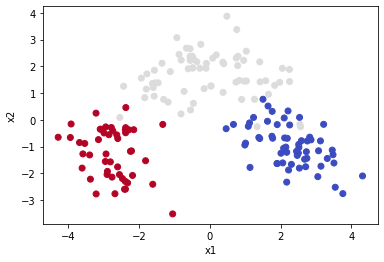

In [9]:
# PCA visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
plt.figure
plot_clusters(X_reduced, y)

# print("Ratio of explained variance are:", pca.explained_variance_ratio_) # wrong
print("cumulative ratio of explained variance are:", np.cumsum(pca.explained_variance_ratio_))

In [10]:
# The ratio of explained variance are [0.36198848 0.55406338].

- If the ratio of captured variance is too low (<0.8 for example), it means a large loss of information by using linear transformation. So you may want to try t-SNE for visualization. Can you use t-SNE to project X to 2D and visualize clusters with ground truth y? (10%)
- Visualize the clustering results (predicted labels) from the three methods (kmeans, agglomerative clustering, and Gaussian mixture model). Compare the clustering results visually against the ground truth. (10%)

    

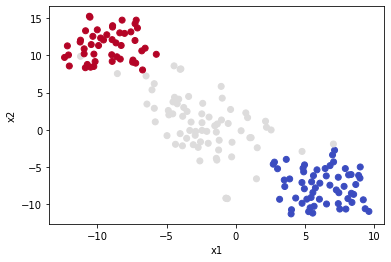

In [11]:
# TSNE visualization
tsne = TSNE()
X_reduced = tsne.fit_transform(X)  
plt.figure()
plot_clusters(X_reduced, y)

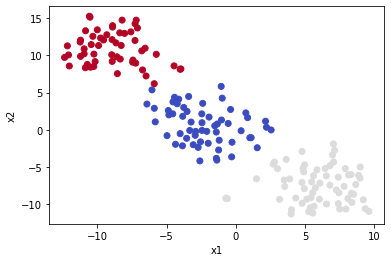

In [12]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_reduced)
cluster_labels = kmeans.labels_
plt.figure()
plot_clusters(X_reduced, cluster_labels)

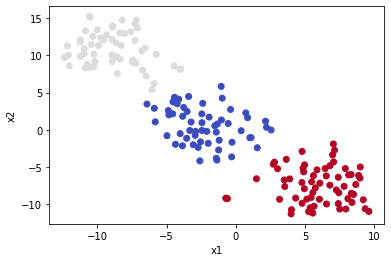

In [13]:
agglo = AgglomerativeClustering(n_clusters=3, linkage= 'ward')
agglo.fit(X_reduced)
cluster_labels = agglo.labels_
plt.figure()
plot_clusters(X_reduced, cluster_labels)

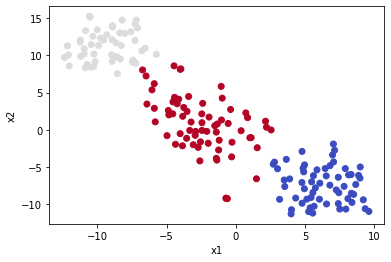

In [14]:
gmm = GaussianMixture(n_components=3, covariance_type = 'full')
cluster_labels = gmm.fit_predict(X_reduced)
plt.figure()
plot_clusters(X_reduced, cluster_labels)

In [15]:
# Other Comparison

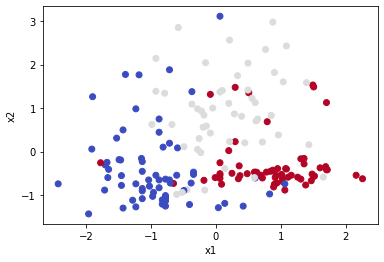

In [16]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
cluster_labels = kmeans.labels_
plt.figure()
plot_clusters(X, cluster_labels)

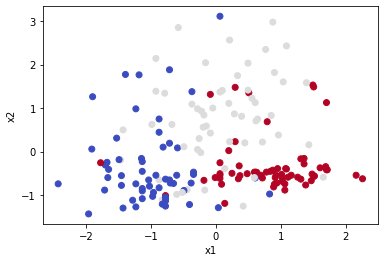

In [17]:
agglo = AgglomerativeClustering(n_clusters=3, linkage= 'ward')
agglo.fit(X)
cluster_labels = agglo.labels_
plt.figure()
plot_clusters(X, cluster_labels)

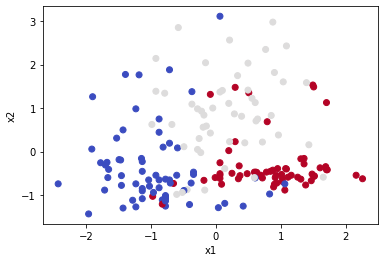

In [18]:
gmm = GaussianMixture(n_components=3, covariance_type = 'full')
cluster_labels = gmm.fit_predict(X)
plt.figure()
plot_clusters(X, cluster_labels)